In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_to_load = "./DATA/2019-Oct.csv"
chunksize = 100_000

In [3]:
chunks = pd.read_csv(file_to_load, chunksize=chunksize)

In [4]:
def getRandomDataset(chunks, frac, seed):
    return pd.concat(chunk.sample(frac=frac, random_state=seed) for chunk in chunks)

In [ ]:
df = getRandomDataset(chunks, 0.01, 42)

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
13963,2019-10-01 02:44:07 UTC,view,1005105,2053013555631882655,electronics.smartphone,apple,1415.48,545069888,627bf82e-85ab-420d-92f2-ecd44895eb19
7853,2019-10-01 02:33:23 UTC,view,1005105,2053013555631882655,electronics.smartphone,apple,1415.48,555463891,b2e5ffff-8305-439e-996b-ca52d063273b
19270,2019-10-01 02:52:51 UTC,view,1305803,2053013558920217191,computers.notebook,hp,772.19,555464435,5f05a588-3c47-4719-a728-41b729d79ad2
31971,2019-10-01 03:10:24 UTC,view,26500137,2053013563550729061,NaN,lucente,122.01,538078498,a9a37639-037e-4ac6-8ad2-5d4e65ee1f05
74611,2019-10-01 04:01:11 UTC,view,6200879,2053013552293216471,appliances.environment.air_heater,oasis,28.70,514578573,92700d7d-9a4c-4b01-8660-207019a62920


In [ ]:
df.describe()

,product_id,category_id,price,user_id
count,4.244880e+05,4.244880e+05,424488.000000,4.244880e+05
mean,1.055194e+07,2.057385e+18,291.560097,5.334841e+08
std,1.188365e+07,1.841418e+16,360.486994,1.851126e+07
min,1.000978e+06,2.053014e+18,0.000000,2.474128e+08
25%,1.005157e+06,2.053014e+18,65.900000,5.158793e+08
50%,5.000475e+06,2.053014e+18,163.735000,5.295037e+08
75%,1.600064e+07,2.053014e+18,359.080000,5.514951e+08
max,6.050000e+07,2.175420e+18,2574.070000,5.662804e+08


In [ ]:
def createNaAndUniqueMatrix(df):
    rows = ["Valeurs nulles", "Valeurs uniques"]

    data = {}

    for column in df.columns:    
        na = df[column].isna()
        unique = len(df[column][~na].unique())

        data[column] = [len(df[na]), unique]

    return pd.DataFrame(data, index=rows)

In [ ]:
createNaAndUniqueMatrix(df)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
Valeurs nulles,0,0,0,0,135223,61243,0,0,0
Valeurs uniques,384353,3,59347,597,126,2444,28947,320337,398654


Analysons les 3 valeurs uniques d'event_type

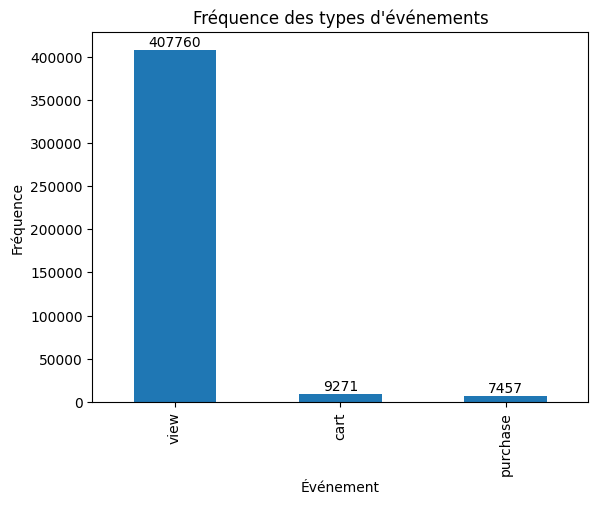

In [ ]:
frequences = df["event_type"][df["event_type"].notna()].value_counts()

ax = frequences.plot(kind="bar")

for i,v in enumerate(frequences):
    ax.text(i, v + 0.1, str(v), ha="center", va="bottom")

plt.title("Fréquence des types d'événements")
plt.xlabel("Événement")
plt.ylabel("Fréquence")
plt.show()

On recense donc 407 760 vues, 9271